Medical Cost Prediction using Linear Regression

✅ Dataset Loaded Successfully!

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520 

✅ Categorical Columns Encoded!

📊 Training Samples: 1070
📊 Testing Samples : 268

📈 Model Performance:
   Mean Squared Error : 33635210.43
   R2 Score           : 0.7833



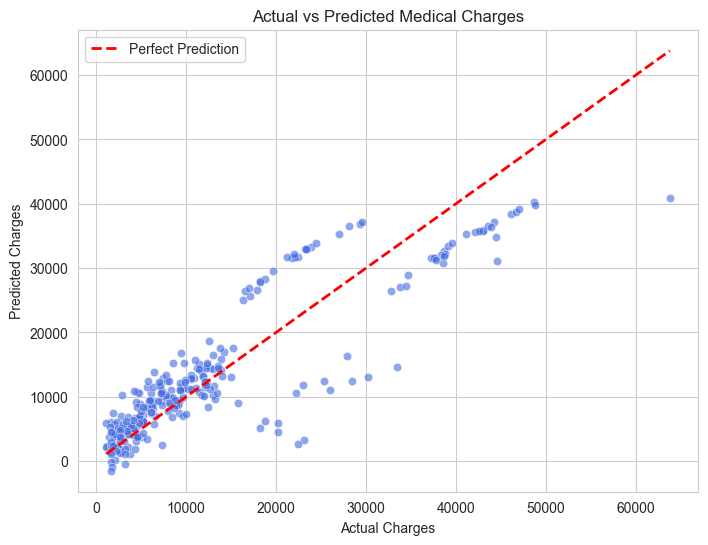

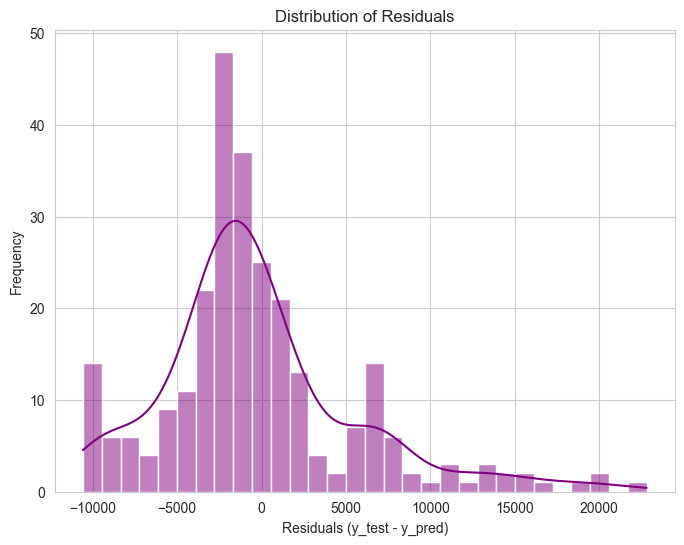

C:\Users\KATANA\AppData\Local\Temp\ipykernel_4848\3405650215.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Feature", data=coeff_df, palette="viridis")


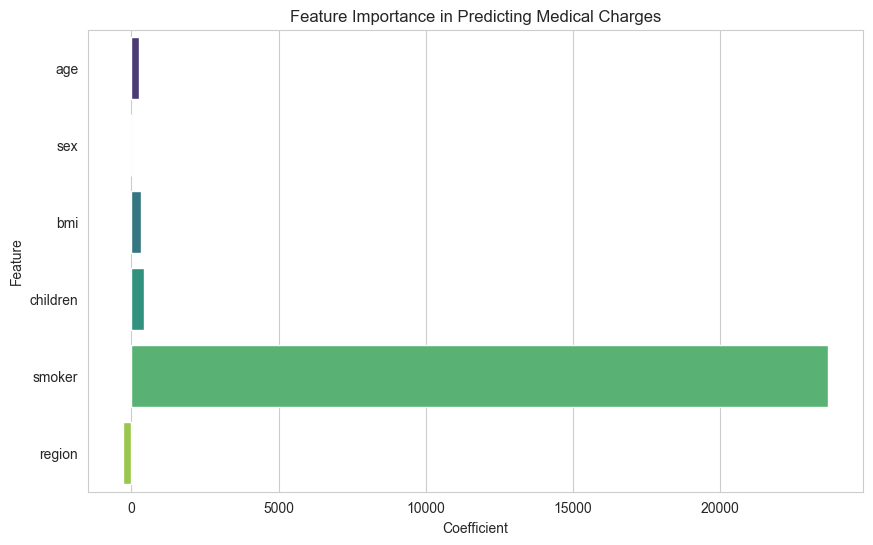

In [2]:

"""
Medical Cost Prediction using Linear Regression
------------------------------------------------
This script trains a Linear Regression model on the Medical Cost Personal Datasets.
It includes:
    - Data loading and preprocessing
    - Train/test split
    - Model training
    - Performance evaluation (MSE, R2 Score)
    - Classic regression visualizations
"""

# ======================
# Importing Libraries
# ======================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


# ======================
# Load Dataset
# ======================
df = pd.read_csv("insurance.csv")   # Change path if needed
print("✅ Dataset Loaded Successfully!\n")
print(df.head(), "\n")


# ======================
# Encode Categorical Variables
# ======================
cat_cols = ["sex", "smoker", "region"]
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

print("✅ Categorical Columns Encoded!\n")


# ======================
# Feature Selection
# ======================
X = df.drop("charges", axis=1)
y = df["charges"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"📊 Training Samples: {X_train.shape[0]}")
print(f"📊 Testing Samples : {X_test.shape[0]}\n")


# ======================
# Train Model
# ======================
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📈 Model Performance:")
print(f"   Mean Squared Error : {mse:.2f}")
print(f"   R2 Score           : {r2:.4f}\n")


# ======================
# Visualization
# ======================

# Plot 1: Actual vs Predicted Charges
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color="royalblue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         "r--", lw=2, label="Perfect Prediction")
plt.title("Actual vs Predicted Medical Charges")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.legend()
plt.show()

# Plot 2: Residuals
plt.figure(figsize=(8, 6))
sns.histplot(y_test - y_pred, bins=30, kde=True, color="purple")
plt.title("Distribution of Residuals")
plt.xlabel("Residuals (y_test - y_pred)")
plt.ylabel("Frequency")
plt.show()

# Plot 3: Feature Importance
plt.figure(figsize=(10, 6))
coeff_df = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
sns.barplot(x="Coefficient", y="Feature", data=coeff_df, palette="viridis")
plt.title("Feature Importance in Predicting Medical Charges")
plt.show()
